# QUESTIONS:
What was the best month for sales? How much was earned that month? <br>
What city sold the most product? <br>
What time should we display advertisemens to maximize the likelihood of customer’s buying product?<br>
What products are most often sold together?<br>
What product sold the most? Why do you think it sold the most?<br>

## Importing packages

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [278]:
import os

## Importing Data

In [279]:
path = './Sales_Data/'
fnames = os.listdir(path)

flist = []
for file in fnames:
    df = pd.read_csv(path+file)
    flist.append(df)
total_df = pd.concat(flist)

In [280]:
#Export combined csv to check
total_df.to_csv('concat_files',index=False)

In [281]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


In [282]:
total_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186850 entries, 0 to 13621
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 10.0+ MB


## Clean up data

### Getting rid of NaN

In [283]:
nan_rows = total_df[total_df['Order Date'].isnull()]
print(total_df.isnull().sum())
nan_rows.head()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
264,NaN,NaN,NaN,NaN,NaN,NaN
648,NaN,NaN,NaN,NaN,NaN,NaN
680,NaN,NaN,NaN,NaN,NaN,NaN
1385,NaN,NaN,NaN,NaN,NaN,NaN
1495,NaN,NaN,NaN,NaN,NaN,NaN


In [284]:
total_df = total_df.dropna(how='all')
print(total_df.isnull().sum())
total_df.head()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,295665,Macbook Pro Laptop,1,1700,12/30/19 00:01,"136 Church St, New York City, NY 10001"
1,295666,LG Washing Machine,1,600.0,12/29/19 07:03,"562 2nd St, New York City, NY 10001"
2,295667,USB-C Charging Cable,1,11.95,12/12/19 18:21,"277 Main St, New York City, NY 10001"
3,295668,27in FHD Monitor,1,149.99,12/22/19 15:13,"410 6th St, San Francisco, CA 94016"
4,295669,USB-C Charging Cable,1,11.95,12/18/19 12:38,"43 Hill St, Atlanta, GA 30301"


### Getting rid of blank values values

In [285]:
total_df[total_df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
254,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
705,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1101,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2875,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
3708,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
10443,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10784,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
10813,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
11047,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [286]:
total_df = total_df[total_df['Order ID'] != 'Order ID']
total_df[total_df['Order ID'] == 'Order ID']

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


## Altering Order Date -> String -> Datetime -> Pulling month out

In [287]:
total_df['DateTime_Str'] = total_df['Order Date'].astype('str')
total_df['DateTime'] = pd.to_datetime(total_df['DateTime_Str'],format='%m/%d/%y %H:%M')
total_df['Month'] = total_df['DateTime'].dt.month
total_df['Year'] = total_df['DateTime'].dt.year
total_df['Hour'] = total_df['DateTime'].dt.hour
total_df.drop(['Order Date','DateTime_Str'],axis=1,inplace=True)
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,DateTime,Month,Year,Hour
0,295665,Macbook Pro Laptop,1,1700,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,2019,0
1,295666,LG Washing Machine,1,600.0,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,2019,7
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,2019,18
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,2019,15
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,2019,12


## Creating a column for total sales 

In [288]:
total_df['Quantity Ordered'] = total_df['Quantity Ordered'].astype('int')
total_df['Price Each'] = total_df['Price Each'].astype('float')

In [289]:
total_df['Sale Amount'] = total_df.apply(lambda row: row['Quantity Ordered'] * row['Price Each'], axis=1)

In [290]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,DateTime,Month,Year,Hour,Sale Amount
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,2019,0,1700.00
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,2019,7,600.00
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,2019,18,11.95
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,2019,15,149.99
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,2019,12,11.95


## Creating a Column for City

In [305]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split()[0]

total_df['City'] = total_df['Purchase Address'].apply(lambda x: get_city(x) + ', ' + get_state(x))

In [306]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,DateTime,Month,Year,Hour,Sale Amount,City
0,295665,Macbook Pro Laptop,1,1700.00,"136 Church St, New York City, NY 10001",2019-12-30 00:01:00,12,2019,0,1700.00,"New York City, NY"
1,295666,LG Washing Machine,1,600.00,"562 2nd St, New York City, NY 10001",2019-12-29 07:03:00,12,2019,7,600.00,"New York City, NY"
2,295667,USB-C Charging Cable,1,11.95,"277 Main St, New York City, NY 10001",2019-12-12 18:21:00,12,2019,18,11.95,"New York City, NY"
3,295668,27in FHD Monitor,1,149.99,"410 6th St, San Francisco, CA 94016",2019-12-22 15:13:00,12,2019,15,149.99,"San Francisco, CA"
4,295669,USB-C Charging Cable,1,11.95,"43 Hill St, Atlanta, GA 30301",2019-12-18 12:38:00,12,2019,12,11.95,"Atlanta, GA"


## What was the best month for sales? How much was earned that month? 

In [293]:
year_month_group = total_df.groupby(['Year', 'Month']).sum()
year_month_group

Quantity Ordered    Price Each    Hour   Sale Amount
Year Month                                                      
2019 1                 10862  1.803265e+06  139433  1.813586e+06
     2                 13449  2.188885e+06  172669  2.202022e+06
     3                 17005  2.791208e+06  218969  2.807100e+06
     4                 20558  3.367671e+06  262259  3.390670e+06
     5                 18667  3.135125e+06  238780  3.152607e+06
     6                 15253  2.562026e+06  195528  2.577802e+06
     7                 16072  2.632540e+06  206169  2.647776e+06
     8                 13448  2.230345e+06  172289  2.244468e+06
     9                 13109  2.084992e+06  168513  2.097560e+06
     10                22703  3.715555e+06  290650  3.736727e+06
     11                19798  3.180601e+06  254865  3.199603e+06
     12                28114  4.588415e+06  359978  4.613443e+06
2020 1                    41  8.503400e+03      52  8.670290e+03

In [294]:
year_month_group.reset_index(inplace=True)

(0, 5000000)

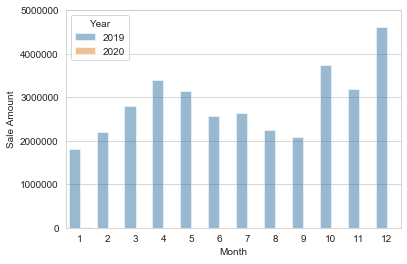

In [295]:
sns.barplot(x='Month', y='Sale Amount', hue='Year', data=year_month_group, alpha=0.5)
plt.ylim(0,5000000)

## What city sold the most product? 


In [307]:
city_group = total_df.groupby(['City']).sum()
city_group

,Quantity Ordered,Price Each,Month,Year,Hour,Sale Amount
City,,,,,,
"Atlanta, GA",16602,2.779908e+06,104794,30044739,214264,2.795499e+06
"Austin, TX",11153,1.809874e+06,69829,19998197,141946,1.819582e+06
"Boston, MA",22528,3.637410e+06,141112,40246750,288225,3.661642e+06
"Dallas, TX",16730,2.752628e+06,104620,29921582,214390,2.767975e+06
"Los Angeles, CA",33289,5.421435e+06,208325,59772496,427444,5.452571e+06
"New York City, NY",27932,4.635371e+06,175741,50224654,357696,4.664317e+06
"Portland, ME",2750,4.471893e+05,17144,4956645,35211,4.497583e+05
"Portland, OR",11303,1.860558e+06,70621,20210192,144421,1.870732e+06
"San Francisco, CA",50239,8.211462e+06,315520,90313920,643265,8.262204e+06


In [309]:
city_group.reset_index(inplace=True)

(0, 10000000)

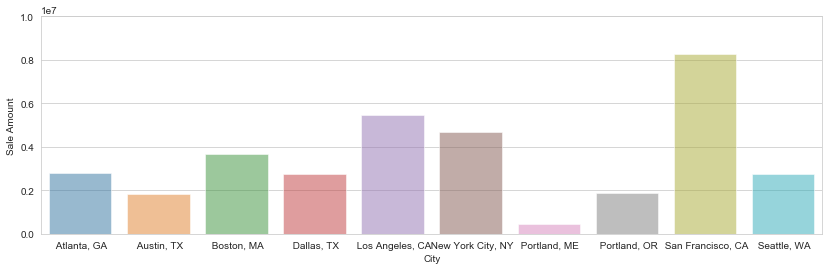

In [313]:
fig = plt.subplots(figsize=(14,4))
sns.barplot(x='City', y='Sale Amount', data=city_group, alpha=0.5)
plt.ylim(0,10000000)

## What time should we display advertisemens to maximize the likelihood of customer’s buying product?

In [321]:
hour_group = total_df.groupby(['Hour']).count()
hour_group

,Order ID,Product,Quantity Ordered,Price Each,Purchase Address,DateTime,Month,Year,Sale Amount,City
Hour,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [322]:
hour_group.reset_index(inplace=True)

(0, 20000)

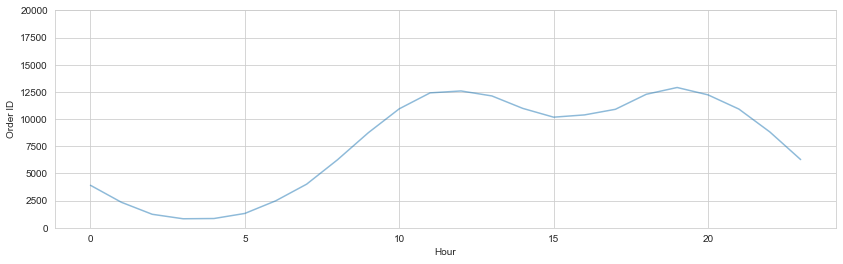

In [329]:
fig = plt.subplots(figsize=(14,4))
sns.lineplot(x='Hour', y='Order ID',data=hour_group, alpha=0.5)
plt.ylim(0,20000)

## What products are most often sold together?

In [339]:
df_filtered = total_df[total_df['Order ID'].duplicated(keep=False)]

df_filtered['Grouped'] = df_filtered.groupby('Order ID')['Product'].transform(lambda x: ', '.join(x))

df_filtered = df_filtered[['Order ID', 'Grouped']].drop_duplicates()

df_filtered.head(10)

/Users/ianreynolds/Desktop/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
16,295681,"Google Phone, USB-C Charging Cable, Bose Sound..."
36,295698,"Vareebadd Phone, USB-C Charging Cable"
42,295703,"AA Batteries (4-pack), Bose SoundSport Headphones"
66,295726,"iPhone, Lightning Charging Cable"
76,295735,"iPhone, Apple Airpods Headphones, Wired Headph..."
80,295737,"iPhone, Lightning Charging Cable"
97,295753,"34in Ultrawide Monitor, Lightning Charging Cable"
104,295759,"Bose SoundSport Headphones, Wired Headphones"
129,295783,"Vareebadd Phone, USB-C Charging Cable"
133,295786,"USB-C Charging Cable, Apple Airpods Headphones"


In [346]:
from itertools import combinations
from collections import Counter 

count = Counter()

for row in df_filtered['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
    
print(count.most_common(10))

[(('iPhone', ' Lightning Charging Cable'), 1005), (('Google Phone', ' USB-C Charging Cable'), 987), (('iPhone', ' Wired Headphones'), 447), (('Google Phone', ' Wired Headphones'), 414), (('Vareebadd Phone', ' USB-C Charging Cable'), 361), (('iPhone', ' Apple Airpods Headphones'), 360), (('Google Phone', ' Bose SoundSport Headphones'), 220), (('Vareebadd Phone', ' Wired Headphones'), 143), ((' USB-C Charging Cable', ' Wired Headphones'), 120), (('Vareebadd Phone', ' Bose SoundSport Headphones'), 80)]


## What product sold the most? Why do you think it sold the most?

In [398]:
product_group = total_df.groupby(['Product']).sum()
product_group['Actual Price Each'] = product_group['Sale Amount'] / product_group['Quantity Ordered']
product_group

,Quantity Ordered,Price Each,Month,Year,Hour,Sale Amount,Actual Price Each
Product,,,,,,,
20in Monitor,4129,451068.99,29336,8279921,58764,454148.71,109.99
27in 4K Gaming Monitor,6244,2429637.70,44440,12578371,90916,2435097.56,389.99
27in FHD Monitor,7550,1125974.93,52558,15156636,107540,1132424.50,149.99
34in Ultrawide Monitor,6199,2348718.19,43304,12479439,89076,2355558.01,379.99
AA Batteries (4-pack),27635,79015.68,145558,41544963,298342,106118.40,3.84
AAA Batteries (4-pack),31017,61716.59,146370,41674182,297332,92740.83,2.99
Apple Airpods Headphones,15661,2332350.00,109477,31393435,223304,2349150.00,150.00
Bose SoundSport Headphones,13457,1332366.75,94113,26903178,192445,1345565.43,99.99
Flatscreen TV,4819,1440000.00,34224,9691201,68815,1445700.00,300.00


In [399]:
product_group.reset_index(inplace=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 <a list of 19 Text xticklabel objects>)

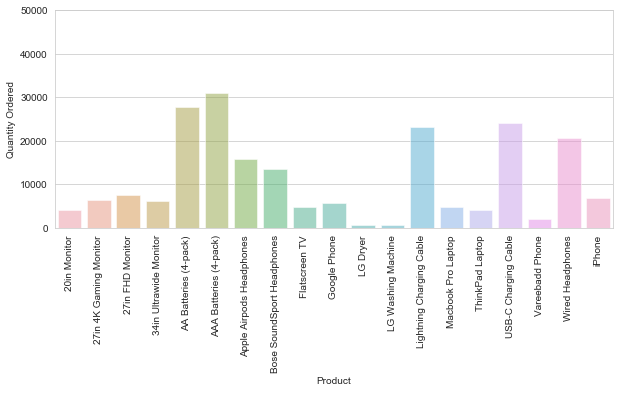

In [400]:
fig = plt.subplots(figsize=(10,4))
sns.barplot(x='Product', y='Quantity Ordered', data=product_group, alpha=0.5)
plt.ylim(0,50000)
plt.xticks(rotation='vertical')

(0, 40000)

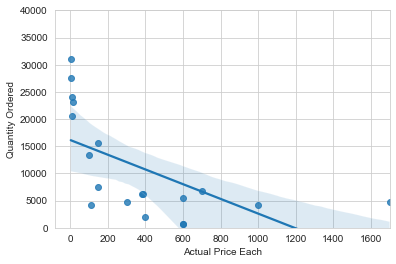

In [366]:
sns.regplot(x='Actual Price Each',y='Quantity Ordered',data=product_group)
plt.ylim(0,40000)

[Text(0, 0, '20in Monitor'),
 Text(0, 0, '27in 4K Gaming Monitor'),
 Text(0, 0, '27in FHD Monitor'),
 Text(0, 0, '34in Ultrawide Monitor'),
 Text(0, 0, 'AA Batteries (4-pack)'),
 Text(0, 0, 'AAA Batteries (4-pack)'),
 Text(0, 0, 'Apple Airpods Headphones'),
 Text(0, 0, 'Bose SoundSport Headphones'),
 Text(0, 0, 'Flatscreen TV'),
 Text(0, 0, 'Google Phone'),
 Text(0, 0, 'LG Dryer'),
 Text(0, 0, 'LG Washing Machine'),
 Text(0, 0, 'Lightning Charging Cable'),
 Text(0, 0, 'Macbook Pro Laptop'),
 Text(0, 0, 'ThinkPad Laptop'),
 Text(0, 0, 'USB-C Charging Cable'),
 Text(0, 0, 'Vareebadd Phone'),
 Text(0, 0, 'Wired Headphones'),
 Text(0, 0, 'iPhone')]

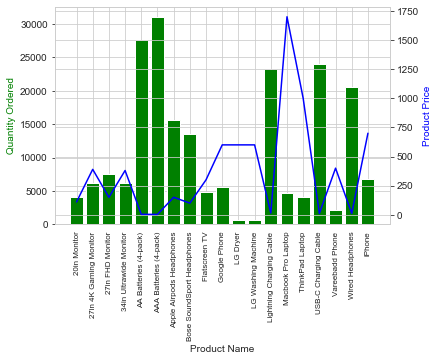

In [411]:
prices = total_df.groupby('Product').mean()['Price Each']


fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(product_group['Product'], product_group['Quantity Ordered'], color='g')
ax2.plot(product_group['Product'], prices, 'b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Product Price', color='b')
ax1.set_xticklabels(product_group['Product'],rotation='vertical', size=8)


